In [89]:
import numpy as np

In [90]:
from numpy import exp, matmul

In [91]:
from numpy.linalg import inv, det, eig, norm

In [92]:
π = np.pi

In [93]:
e = exp(1)

In [94]:
def diag(t):
    return np.array([[e**(t/2),0],[0,e**(-t/2)]])

In [95]:
def act(M,pair):
    (x,y), (q,v) = pair
    (a,b),(c,d) = M
    h = det(M)
    denom  = np.array([c*x+d,c*y])
    mat = np.array([[(d**2+c**2*(x**2-y**2)+2*d*c*x),(2*c**2*x*y+2*d*c*y)],[-(2*c**2*x*y+2*d*c*y),(d**2+c**2*(x**2-y**2)+2*d*c*x)]])
    newXi = matmul(mat,pair[1])
    return (np.array([a*c*norm(z)+b*d+(a*d+b*c)*x, h*y])/norm(denom), newXi*h/norm(denom)**2)

In [96]:
def flow(t, pair):
    return act(diag(t), pair)

In [97]:
def identity(M):
    i = np.array([0,1])
    up  = np.array([0,1])
    return act(M,(i,up))

In [98]:
def isSpecial(M):
    return det(M) == 1

In [99]:
def isUnit(pair):
    return norm(pair[1])==pair[0][1]

In [3]:
import sympy as sp

In [4]:
from sympy import *

In [3]:
pi

pi

In [4]:
E

E

In [5]:
I

I

In [7]:
I**2

-1

In [8]:
M = Matrix([[1, 2, 3], [3, 2, 1], [1, 1, 1]])

In [9]:
M.det()

0

In [15]:
2*M

Matrix([
[2, 4, 6],
[6, 4, 2],
[2, 2, 2]])

In [7]:
def geodesicInfoFromMatrix(M): #input is a hyperbolic matrix M which lies in SL_2(Z)
    if M.trace() < 0:
        M = -M
    tr = M.trace()
    length = 2*log(tr/2+sqrt((tr/2)**sympify(2)-1))
    eig = E**(length/2)
    a = M[0,0]
    b = M[0,1]
    c = M[1,0]
    d = M[1,1]
    if c > 0:
        eigMat = (1/((c**2)*(tr**2-4))**(sympify(1)/4))*Matrix([[eig-d,1/eig-d],[c,c]])
    else: 
        eigMat = (1/((c**2)*(tr**2-4))**(sympify(1)/4))*Matrix([[-eig+d,1/eig-d],[-c,c]])
    visPt = (eig-d)/c
    newA = eigMat[0,0]
    newB = eigMat[0,1]
    newC = eigMat[1,0]
    newD = eigMat[1,1]
    z = simplify((newA*I+newB)/(newC*I+newD))
    zeta = simplify(I/(newC*I+newD)**2)
    return (length,eig,eigMat,visPt,z,zeta)

In [14]:
M[1,0]

3

In [6]:
result = geodesicInfoFromMatrix(Matrix([[12,5],[-5,-2]]))

In [7]:
result[0]

2*log(2*sqrt(6) + 5)

In [50]:
result[1]

2*sqrt(6) + 5

In [51]:
result[3]

-7/5 - 2*sqrt(6)/5

In [57]:
result[2]

Matrix([
[sqrt(5)*6**(3/4)*(-7 - 2*sqrt(6))/60, sqrt(5)*6**(3/4)*(1/(2*sqrt(6) + 5) + 2)/60],
[                 sqrt(5)*6**(3/4)/12,                        -sqrt(5)*6**(3/4)/12]])

In [56]:
M = Matrix([[12,5],[-5,-2]])

In [36]:
Pow(M.trace()**2-4,sympify(1)/4)

2*6**(1/4)

In [67]:
result[4]

-7/5 + 2*sqrt(6)*I/5

In [68]:
result[5]

-2*sqrt(6)/5

In [47]:
from sympy.abc import a,b

In [50]:
c = -5

In [71]:
c

-5

In [58]:
solTuple = diop_linear(a*d-b*c-1)

In [60]:
(a,b) = (solTuple[0].subs(solTuple[0].args[1].args[1],0),solTuple[1].subs(solTuple[0].args[1].args[1],0))

In [61]:
a

2

In [62]:
b

1

In [132]:
t_0 = symbols("t_0")

In [130]:
t_0

t_0

In [109]:
t_0 + 1

t_0 + 1

In [112]:
(t_0+1).subs(t_0,1)

2

In [131]:
expr.args[1].args[1].subs(t_0,0)

t_0

In [133]:
a = symbols("b")

In [134]:
a

b

In [136]:
expr

In [ ]:
diop_linear(a*d-b*c-1)[0]

In [133]:
from sympy.solvers.diophantine import base_solution_linear

def fundDomainRep(z,zeta):
    x = re(z)
    y = im(z)
    cMin = 0
    dMin = 1
    for c in range(ceiling(-1/abs(y)),floor(1/abs(y))+1):
        for d in range(ceiling(-1-c*x),floor(1-c*x)+1):
            if N((c*x+d)**2+(c*y)**2) < N((cMin*x+dMin)**2+(cMin*y)**2):
                if igcd(c,d) == 1: #restrict to c,d coprime so that things work out
                    cMin = c
                    dMin = d
    c = cMin
    d = dMin
    (a,b) = base_solution_linear(1,d,-c) #solves the linear diophantine equation
    zNew = (a*z+b)/(c*z+d) #will be a horizontal translate of the desired z
    trans = floor(re(zNew)+1/2) #translation factor
    zNew = simplify(zNew - trans) #desired z
    zetaNew = simplify(zeta/(c*z+d))
    mat = Matrix([[a-trans*c,b-trans*d],[c,d]])
    return (zNew,zetaNew,mat)

In [134]:
fundDomainRep(result[4],result[5])[0]

NameError: name 'result' is not defined

In [130]:
fundDomainRep(result[4],result[5])[1]

0 1


-2*sqrt(6)/5

In [15]:
result[4]

-7/5 + 2*sqrt(6)*I/5

In [163]:
fundDomainRep(4+2*I,I/2)[0]

2*I

In [125]:
from sympy.solvers.diophantine import base_solution_linear

In [127]:
base_solution_linear(1,-2,-5)

(2, -1)

In [153]:
simplify(-1/(sympify(3)/4+I/2-1)-1)

-1/5 + 8*I/5

In [159]:
simplify((sympify(3)/4+I/2)/(-1*(sympify(3)/4+I/2)+1))

-1/5 + 8*I/5

In [38]:
fundDomainRep(4+2*I,I/2)[0]

2*I

In [111]:
abs(simplify(fundDomainRep(1/pi**3+I/E**5,I/E**5)[1]))

pi**3/sqrt(pi**6 + exp(10))

In [115]:
im(fundDomainRep(1/pi**3+I/E**5,I/E**5)[0])

exp(-5)/(exp(-10) + pi**(-6))

In [24]:
E

E

In [25]:
1/E

exp(-1)

In [36]:
pi

pi

In [53]:
import time


In [59]:
t = time.process_time()
for i in range(10000000):
    pass
print(time.process_time() - t)

0.410346999999998


In [60]:
abs(I)

1

In [61]:
abs(1+I)

sqrt(2)

In [11]:
def inFundDom(z):
    return (re(N(abs(z))) >= 1) and (re(N(abs(re(z))))<=1/2)

In [9]:
def fundDomRepNew(z,zeta):
    mat = Matrix([[1,0],[0,1]])
    while not inFundDom(z):
        trans = floor(re(z)+1/2) #translation factor
        z = z - trans #desired z
        mat = Matrix([[1,-trans],[0,1]])*mat
        if (re(N(abs(z))) < 1):
            zeta = simplify(zeta/z**2)
            z = simplify(-1/z)
            mat = Matrix([[0,1],[-1,0]])*mat
    return (z,zeta,mat)

In [55]:
def fundDomGeo(mat,res): #input hyperbolic geodesic matrix
    geoInfo = geodesicInfoFromMatrix(mat)
    length = geoInfo[0]
    eigMat = geoInfo[2]
    z = geoInfo[4]
    zeta = geoInfo[5]
    pointlist = []
    newRep = fundDomRepNew(z,zeta)
    z = newRep[0]
    zeta = newRep[1]
    eigMat = newRep[2]*eigMat
    pointlist.append((re(N(z)),im(N(z))))
    for t in range(res):        
        eigMat = eigMat*Matrix([[E**(length/(2*res)),0],[0,E**(-length/(2*res))]])
        newA = re(N(eigMat[0,0]))
        newB = re(N(eigMat[0,1]))
        newC = re(N(eigMat[1,0]))
        newD = re(N(eigMat[1,1]))
        timer = time.process_time()
        z = N((newA*I+newB)/(newC*I+newD))
        zeta = N(I/(newC*I+newD)**2)
        print(time.process_time() - timer)
        if not inFundDom(z):
            newRep = fundDomRepNew(z,zeta)
            z = newRep[0]
            zeta = newRep[1]
            eigMat = newRep[2]*eigMat
        pointlist.append((re(N(z)),im(N(z))))
    plt.scatter(*zip(*pointlist))
    plt.show()

In [37]:
fundDomRepNew(3/sympify(4)+I/2,I/2)

(-1/5 + 8*I/5,
 -32/25 - 24*I/25,
 Matrix([
 [ 1, 0],
 [-1, 1]]))

In [4]:
from sympy import *

In [149]:
simplify((3/sympify(4)+I/2)/(-1*(3/sympify(4)+I/2)+1))

-1/5 + 8*I/5

0.00394299999999248
0.0031359999999835964
0.0030690000000390683
0.0030460000000402943
0.004945999999961259
0.004638999999997395
0.0030060000000275977
0.0037510000000224863
0.0031869999999685206
0.003129999999998745
0.002736000000027161
0.004226000000016938
0.003149000000007618
0.003444999999999254
0.0030470000000377695
0.002946000000008553
0.0032270000000380605
0.0034159999999587853
0.00344799999999168
0.003119999999967149
0.0037079999999605207
0.0049040000000104556
0.0032280000000355358
0.00484900000003563
0.0037499999999681677
0.0027589999999690917
0.0035340000000019245
0.0032439999999951397
0.0038969999999949323
0.003796000000022559
0.0038749999999936335
0.0036560000000349646
0.004162000000007993
0.004551999999989675
0.0038010000000099353
0.0031740000000013424
0.004686999999989894
0.003344000000026881
0.0036269999999944957
0.0028570000000058826
0.0036410000000159926
0.005285000000014861
0.0036630000000172913
0.00446199999998953
0.004213999999990392
0.0029250000000047294
0.0040930000

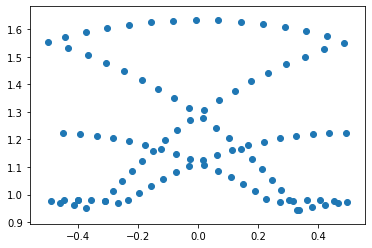

In [56]:
fundDomGeo(Matrix([[12,5],[-5,-2]]),100)

In [30]:
import matplotlib.pyplot as plt

In [39]:
import time